In [1]:
pip install uszipcode

     |████████████████████████████████| 76 kB 2.0 MB/s 
     |████████████████████████████████| 120 kB 13.8 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
     |████████████████████████████████| 42 kB 763 kB/s 


In [2]:
# Importando bibliotecas
from uszipcode import SearchEngine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [13]:
search = SearchEngine()

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [3]:
from google.colab import files
uploaded = files.upload()


Saving kc_house_data.csv to kc_house_data.csv


In [138]:
df = pd.read_csv('/content/kc_house_data.csv', sep=',')
df['id'].value_counts()

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

In [158]:
#Identificando as cidades

df['city'] = df['zipcode'].map(lambda x: search.by_zipcode(x).major_city)
df.head()

,city,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,zipcode,lat,long,sqft_living15,sqft_lot15,sold,Diff,market_value,price_per_area,meanPrice_per_city
0,Seattle,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,98178,47.5112,-122.257,1340,5650,False,NaN,NaN,188.050847,304.774958
1,Seattle,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,98125,47.7210,-122.319,1690,7639,False,NaN,NaN,209.338521,304.774958
2,Kenmore,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,98028,47.7379,-122.233,2720,8062,False,NaN,NaN,233.766234,225.143085
3,Seattle,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,98136,47.5208,-122.393,1360,5000,False,NaN,NaN,308.163265,304.774958
4,Sammamish,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,98074,47.6168,-122.045,1800,7503,False,NaN,NaN,303.571429,267.003458


In [159]:
# Avaliando quais IDs estão repetidos

sold = df.duplicated(subset='id')
df['sold'] = list(sold)
df[['id', 'date', 'price','sold','city']]

,id,date,price,sold,city
0,7129300520,20141013T000000,221900.0,False,Seattle
1,6414100192,20141209T000000,538000.0,False,Seattle
2,5631500400,20150225T000000,180000.0,False,Kenmore
3,2487200875,20141209T000000,604000.0,False,Seattle
4,1954400510,20150218T000000,510000.0,False,Sammamish
...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,False,Seattle
21609,6600060120,20150223T000000,400000.0,False,Seattle
21610,1523300141,20140623T000000,402101.0,False,Seattle
21611,291310100,20150116T000000,400000.0,False,Issaquah


In [160]:
#Calculando a diferença entre o preço dos IDs repetidos
#Agrupando por ID

df['Diff'] = df.groupby(['id', 'city'], as_index=False)['price'].diff()
df[['id', 'date', 'price','sold', 'city', 'Diff']]

,id,date,price,sold,city,Diff
0,7129300520,20141013T000000,221900.0,False,Seattle,NaN
1,6414100192,20141209T000000,538000.0,False,Seattle,NaN
2,5631500400,20150225T000000,180000.0,False,Kenmore,NaN
3,2487200875,20141209T000000,604000.0,False,Seattle,NaN
4,1954400510,20150218T000000,510000.0,False,Sammamish,NaN
...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,False,Seattle,NaN
21609,6600060120,20150223T000000,400000.0,False,Seattle,NaN
21610,1523300141,20140623T000000,402101.0,False,Seattle,NaN
21611,291310100,20150116T000000,400000.0,False,Issaquah,NaN


In [161]:
df.loc[ df['sold'] == True ]

,city,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,zipcode,lat,long,sqft_living15,sqft_lot15,sold,Diff,market_value,price_per_area,meanPrice_per_city
94,Seattle,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,...,98117,47.6870,-122.386,1570,4500,True,270000.0,Valorizou,443.037975,304.774958
314,Bellevue,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,...,98006,47.5503,-122.102,3860,11244,True,16000.0,Valorizou,326.340326,340.335312
325,Seattle,7520000520,20150311T000000,240500.0,2,1.00,1240,12092,1.0,0,...,98146,47.4957,-122.352,1820,7460,True,8500.0,Valorizou,193.951613,304.774958
346,Seattle,3969300030,20141229T000000,239900.0,4,1.00,1000,7134,1.0,0,...,98178,47.4897,-122.240,1020,7138,True,74900.0,Valorizou,239.900000,304.774958
372,Seattle,2231500030,20150324T000000,530000.0,4,2.25,2180,10754,1.0,0,...,98133,47.7711,-122.341,1810,6929,True,215000.0,Valorizou,243.119266,304.774958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,Snoqualmie,7853400250,20150219T000000,645000.0,4,3.50,2910,5260,2.0,0,...,98065,47.5168,-121.883,2910,5260,True,35000.0,Valorizou,221.649485,210.886047
20613,Seattle,2724049222,20141201T000000,220000.0,2,2.50,1000,1092,2.0,0,...,98118,47.5419,-122.271,1330,1466,True,56200.0,Valorizou,220.000000,304.774958
20670,North Bend,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,...,98045,47.4759,-121.734,2680,5992,True,52010.0,Valorizou,187.313433,220.464528
20780,Seattle,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,...,98133,47.7076,-122.342,1130,1598,True,140000.0,Valorizou,316.666667,304.774958


In [147]:
# Categorizando como Valorizado, Igual e Desvalorizado

df.loc[ df['Diff'] > 0, 'market_value'  ] = "Valorizou"
df.loc[ df['Diff'] == 0, 'market_value' ] = "Igual"
df.loc[ df['Diff'] < 0, 'market_value'  ] = "Desvalorizou"
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,sold,Diff,market_value
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,Seattle,False,NaN,NaN
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,Seattle,False,NaN,NaN
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,Kenmore,False,NaN,NaN
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,Seattle,False,NaN,NaN
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,Sammamish,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,Seattle,False,NaN,NaN
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,Seattle,False,NaN,NaN
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,Seattle,False,NaN,NaN
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,Issaquah,False,NaN,NaN


In [154]:
#Calculando Preço por m² do imóvel

precoArea = []


for p, s in zip(df['price'],df['sqft_living']):
    x = p/s
    precoArea.append(x)
df['price_per_area'] = precoArea
df['price_per_area']

0        188.050847
1        209.338521
2        233.766234
3        308.163265
4        303.571429
            ...    
21608    235.294118
21609    173.160173
21610    394.216667
21611    250.000000
21612    318.627451
Name: price_per_area, Length: 21613, dtype: float64

In [155]:
df[['id', 'date', 'price','sold', 'Diff', 'city', 'price_per_area', 'market_value']]

,id,date,price,sold,Diff,city,price_per_area,market_value
0,7129300520,20141013T000000,221900.0,False,NaN,Seattle,188.050847,NaN
1,6414100192,20141209T000000,538000.0,False,NaN,Seattle,209.338521,NaN
2,5631500400,20150225T000000,180000.0,False,NaN,Kenmore,233.766234,NaN
3,2487200875,20141209T000000,604000.0,False,NaN,Seattle,308.163265,NaN
4,1954400510,20150218T000000,510000.0,False,NaN,Sammamish,303.571429,NaN
...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,False,NaN,Seattle,235.294118,NaN
21609,6600060120,20150223T000000,400000.0,False,NaN,Seattle,173.160173,NaN
21610,1523300141,20140623T000000,402101.0,False,NaN,Seattle,394.216667,NaN
21611,291310100,20150116T000000,400000.0,False,NaN,Issaquah,250.000000,NaN


In [156]:
#Calculando preço por m² médio da cidade
meanPrice_per_city = df.groupby(['city'])['price_per_area'].mean()
df = df.set_index(['city'])
df['meanPrice_per_city'] = meanPrice_per_city
df = df.reset_index()
df



,city,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,zipcode,lat,long,sqft_living15,sqft_lot15,sold,Diff,market_value,price_per_area,meanPrice_per_city
0,Seattle,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,98178,47.5112,-122.257,1340,5650,False,NaN,NaN,188.050847,304.774958
1,Seattle,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,98125,47.7210,-122.319,1690,7639,False,NaN,NaN,209.338521,304.774958
2,Kenmore,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,98028,47.7379,-122.233,2720,8062,False,NaN,NaN,233.766234,225.143085
3,Seattle,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,98136,47.5208,-122.393,1360,5000,False,NaN,NaN,308.163265,304.774958
4,Sammamish,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,98074,47.6168,-122.045,1800,7503,False,NaN,NaN,303.571429,267.003458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,Seattle,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,...,98103,47.6993,-122.346,1530,1509,False,NaN,NaN,235.294118,304.774958
21609,Seattle,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,...,98146,47.5107,-122.362,1830,7200,False,NaN,NaN,173.160173,304.774958
21610,Seattle,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,...,98144,47.5944,-122.299,1020,2007,False,NaN,NaN,394.216667,304.774958
21611,Issaquah,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,...,98027,47.5345,-122.069,1410,1287,False,NaN,NaN,250.000000,260.549165


In [162]:
df.columns.values

array(['city', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'sold', 'Diff', 'market_value', 'price_per_area',
       'meanPrice_per_city'], dtype=object)

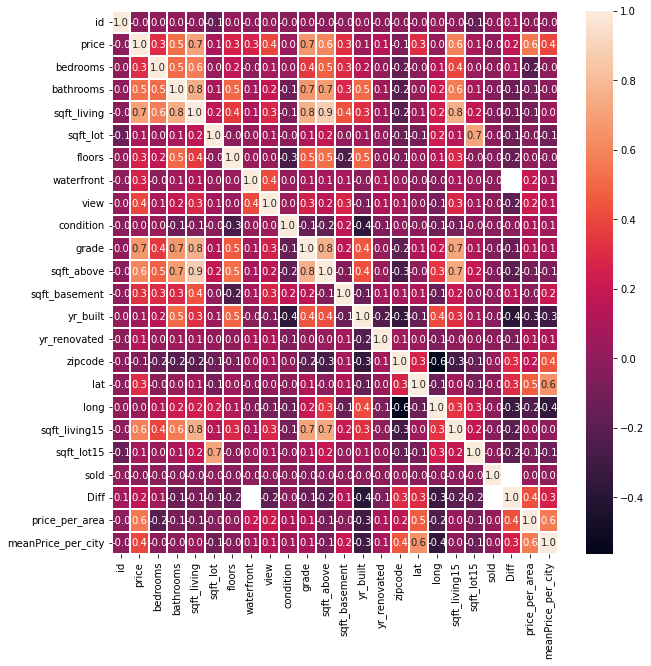

In [163]:
#Avaliando parâmetros mais relevantes

correlation = df[['city', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'sold', 'Diff', 'market_value', 'price_per_area',
       'meanPrice_per_city']].corr()
plt.figure(figsize=[10,10])
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=1 )
plot